## Linear Regression


### Pizza Price Predictor
* predict the price of a pizza by looking at the diameter

Recall that the equation for a line is $y = mx + b$.  Given a set of points (x,y) we are looking to find $m$ and $b$ by finding the best fit to the given set of points.



/usr/local/lib/python3.4/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


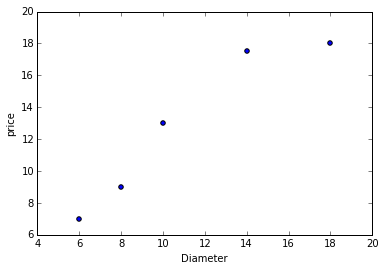

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pizza_diams = np.array([6,8,10,14,18])
pizza_price = np.array([7,9,13,17.5,18])
plt.scatter(pizza_diams, pizza_price)
plt.xlabel('Diameter')
plt.ylabel('price')

The variance is a measure of how much a set of values are spread out.

$var(x) = \frac{\sum{(x_i-\bar{x})^2}}{n-1}$

The covariance is a measure of how much two variables change together

$cov(x,y) = \frac{\sum{(x_i-\bar{x})(y_i-\bar{y})}}{n-1}$

But, $m = \frac{cov(x,y)}{var(x)}$

and

$b = \bar{y}-m\bar{x}$

    pizza_diams = np.array([6,8,10,14,18])
    pizza_price = np.array([7,9,13,17.5,18])
    

In [5]:
np.var(pizza_diams,ddof=1)

23.199999999999999

In [31]:
m = .9763
b = 1.965
xvals = np.arange(4,20,1)

/usr/local/lib/python3.4/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


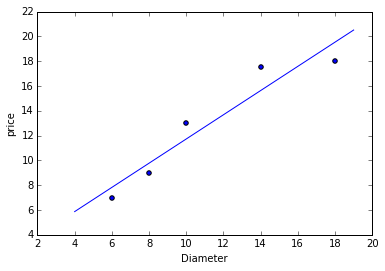

In [32]:
pizza_diams = np.array([6,8,10,14,18])
pizza_price = np.array([7,9,13,17.5,18])
plt.scatter(pizza_diams, pizza_price)
plt.plot(xvals,m*xvals+b)
plt.xlabel('Diameter')
plt.ylabel('price')

In [60]:
from sklearn.linear_model import LinearRegression
#pizza_diams_m = np.array([[6],[8],[10],[14],[18]])
pizza_diams_m = pizza_diams.reshape(5,1)
pizza_price_m = pizza_price.reshape(5,1)
rgm = LinearRegression()
rgm.fit(pizza_diams_m,pizza_price_m)
print(rgm.coef_,rgm.intercept_)
print(pizza_diams_m)

[[ 0.9762931]] [ 1.96551724]
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]


In [34]:
pvals = rgm.predict([[i] for i in range(1,21)])

/usr/local/lib/python3.4/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


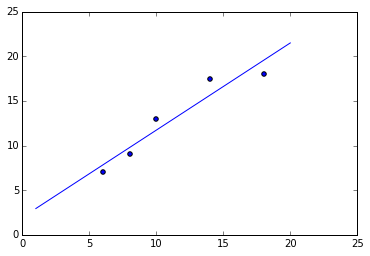

In [41]:
plt.scatter(pizza_diams, pizza_price)
plt.plot([i for i in range(1,21)],pvals.ravel())

### Calculating the error of a regression?

* Mean Absolute Error
* Mean Squared Error
* r-squared -- the proportion of the variance in the response variable that is explained by the model

$\frac{SS_{res}}{SS_{tot}}$

$r^2 = 1 - \frac{\sum{(y_i-f(x_i))^2}}{\sum{(y_i-\bar{y})^2}}$

Scikit learn calculates it differently than the square of pearsons r value.   Some define pearsons correlation as the covariance divided by the standard deviation of x * standard deviation of y

![](http://www.socscistatistics.com/images/pearson.png)

## Standard Deviation

The standard deviation is the square root of the variance.  Its nicer in some ways because the units are the same as the mean.

$std(x) = \sqrt{\frac{\sum{(x_i-\bar{x})^2}}{N-1}}$

In [56]:
rgm.score(pizza_diams_m,pizza_price_m)
X_test = np.array([8,9,11,16,12]).reshape(5,1)
Y_test = np.array([11,8.5,15,18,11]).reshape(5,1)
rgm.score(X_test,Y_test)

0.6620052929422553

### Linear regression generalizes to mulitple dimensions


Suppose we add the number of toppings to the model



In [64]:
pizza_features = np.array([[6,2],[8,1],[10,0],[14,2],[18,0]])
trgm = LinearRegression()
trgm.fit(pizza_features,pizza_price_m)
tpvals = trgm.predict(pizza_features)


In [65]:
tX_test = np.array([[8,2],[9,0],[11,2],[16,2],[12,0]])
trgm.score(tX_test,Y_test)

0.77016777313184681

### Try this out in even higher dimensions on the boston house pricing dataset in scikit learn

* http://bigdataexaminer.com/uncategorized/how-to-run-linear-regression-in-python-scikit-learn/

